In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

uploaded = files.upload()

Saving Jamboree_Admission.csv to Jamboree_Admission.csv


In [2]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Jamboree_Admission.csv']))
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
df.describe().round(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,316.47,107.19,3.11,3.37,3.48,8.58,0.56,0.72
std,144.48,11.30,6.08,1.14,0.99,0.93,0.60,0.50,0.14
min,1.00,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,125.75,308.00,103.00,2.00,2.50,3.00,8.13,0.00,0.63
50%,250.50,317.00,107.00,3.00,3.50,3.50,8.56,1.00,0.72
75%,375.25,325.00,112.00,4.00,4.00,4.00,9.04,1.00,0.82
max,500.00,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


In [6]:
df.shape

(500, 9)

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [9]:
df_new = df.copy()

In [10]:
df_new.drop(['Serial No.'],axis=1,inplace=True)

In [11]:
df_new.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

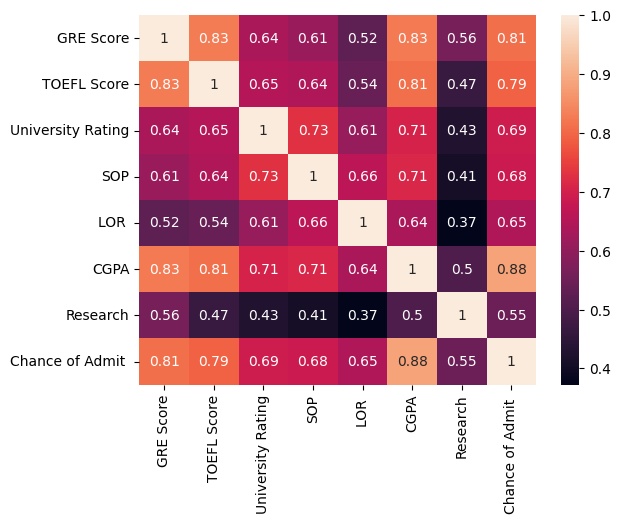

In [12]:
sns.heatmap(df_new.corr(),annot=True)

### Observations from Heatmap
* Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit
Infact, they are also highly correlated amongst themselves

In [13]:
df_new.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [14]:
df_new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Univariate Analysis

In [15]:
df_new['GRE Score'].describe()

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

In [16]:
df_new['TOEFL Score'].describe()

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

In [17]:
df_new['University Rating'].describe()

count    500.000000
mean       3.114000
std        1.143512
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64

In [18]:
df_new['SOP'].describe()

count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64

In [19]:
df_new['LOR'].describe()

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64

In [20]:
df_new['CGPA'].describe()

count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64

In [21]:
df_new['Research'].describe()

count    500.000000
mean       0.560000
std        0.496884
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64

In [22]:
df_new['Chance of Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

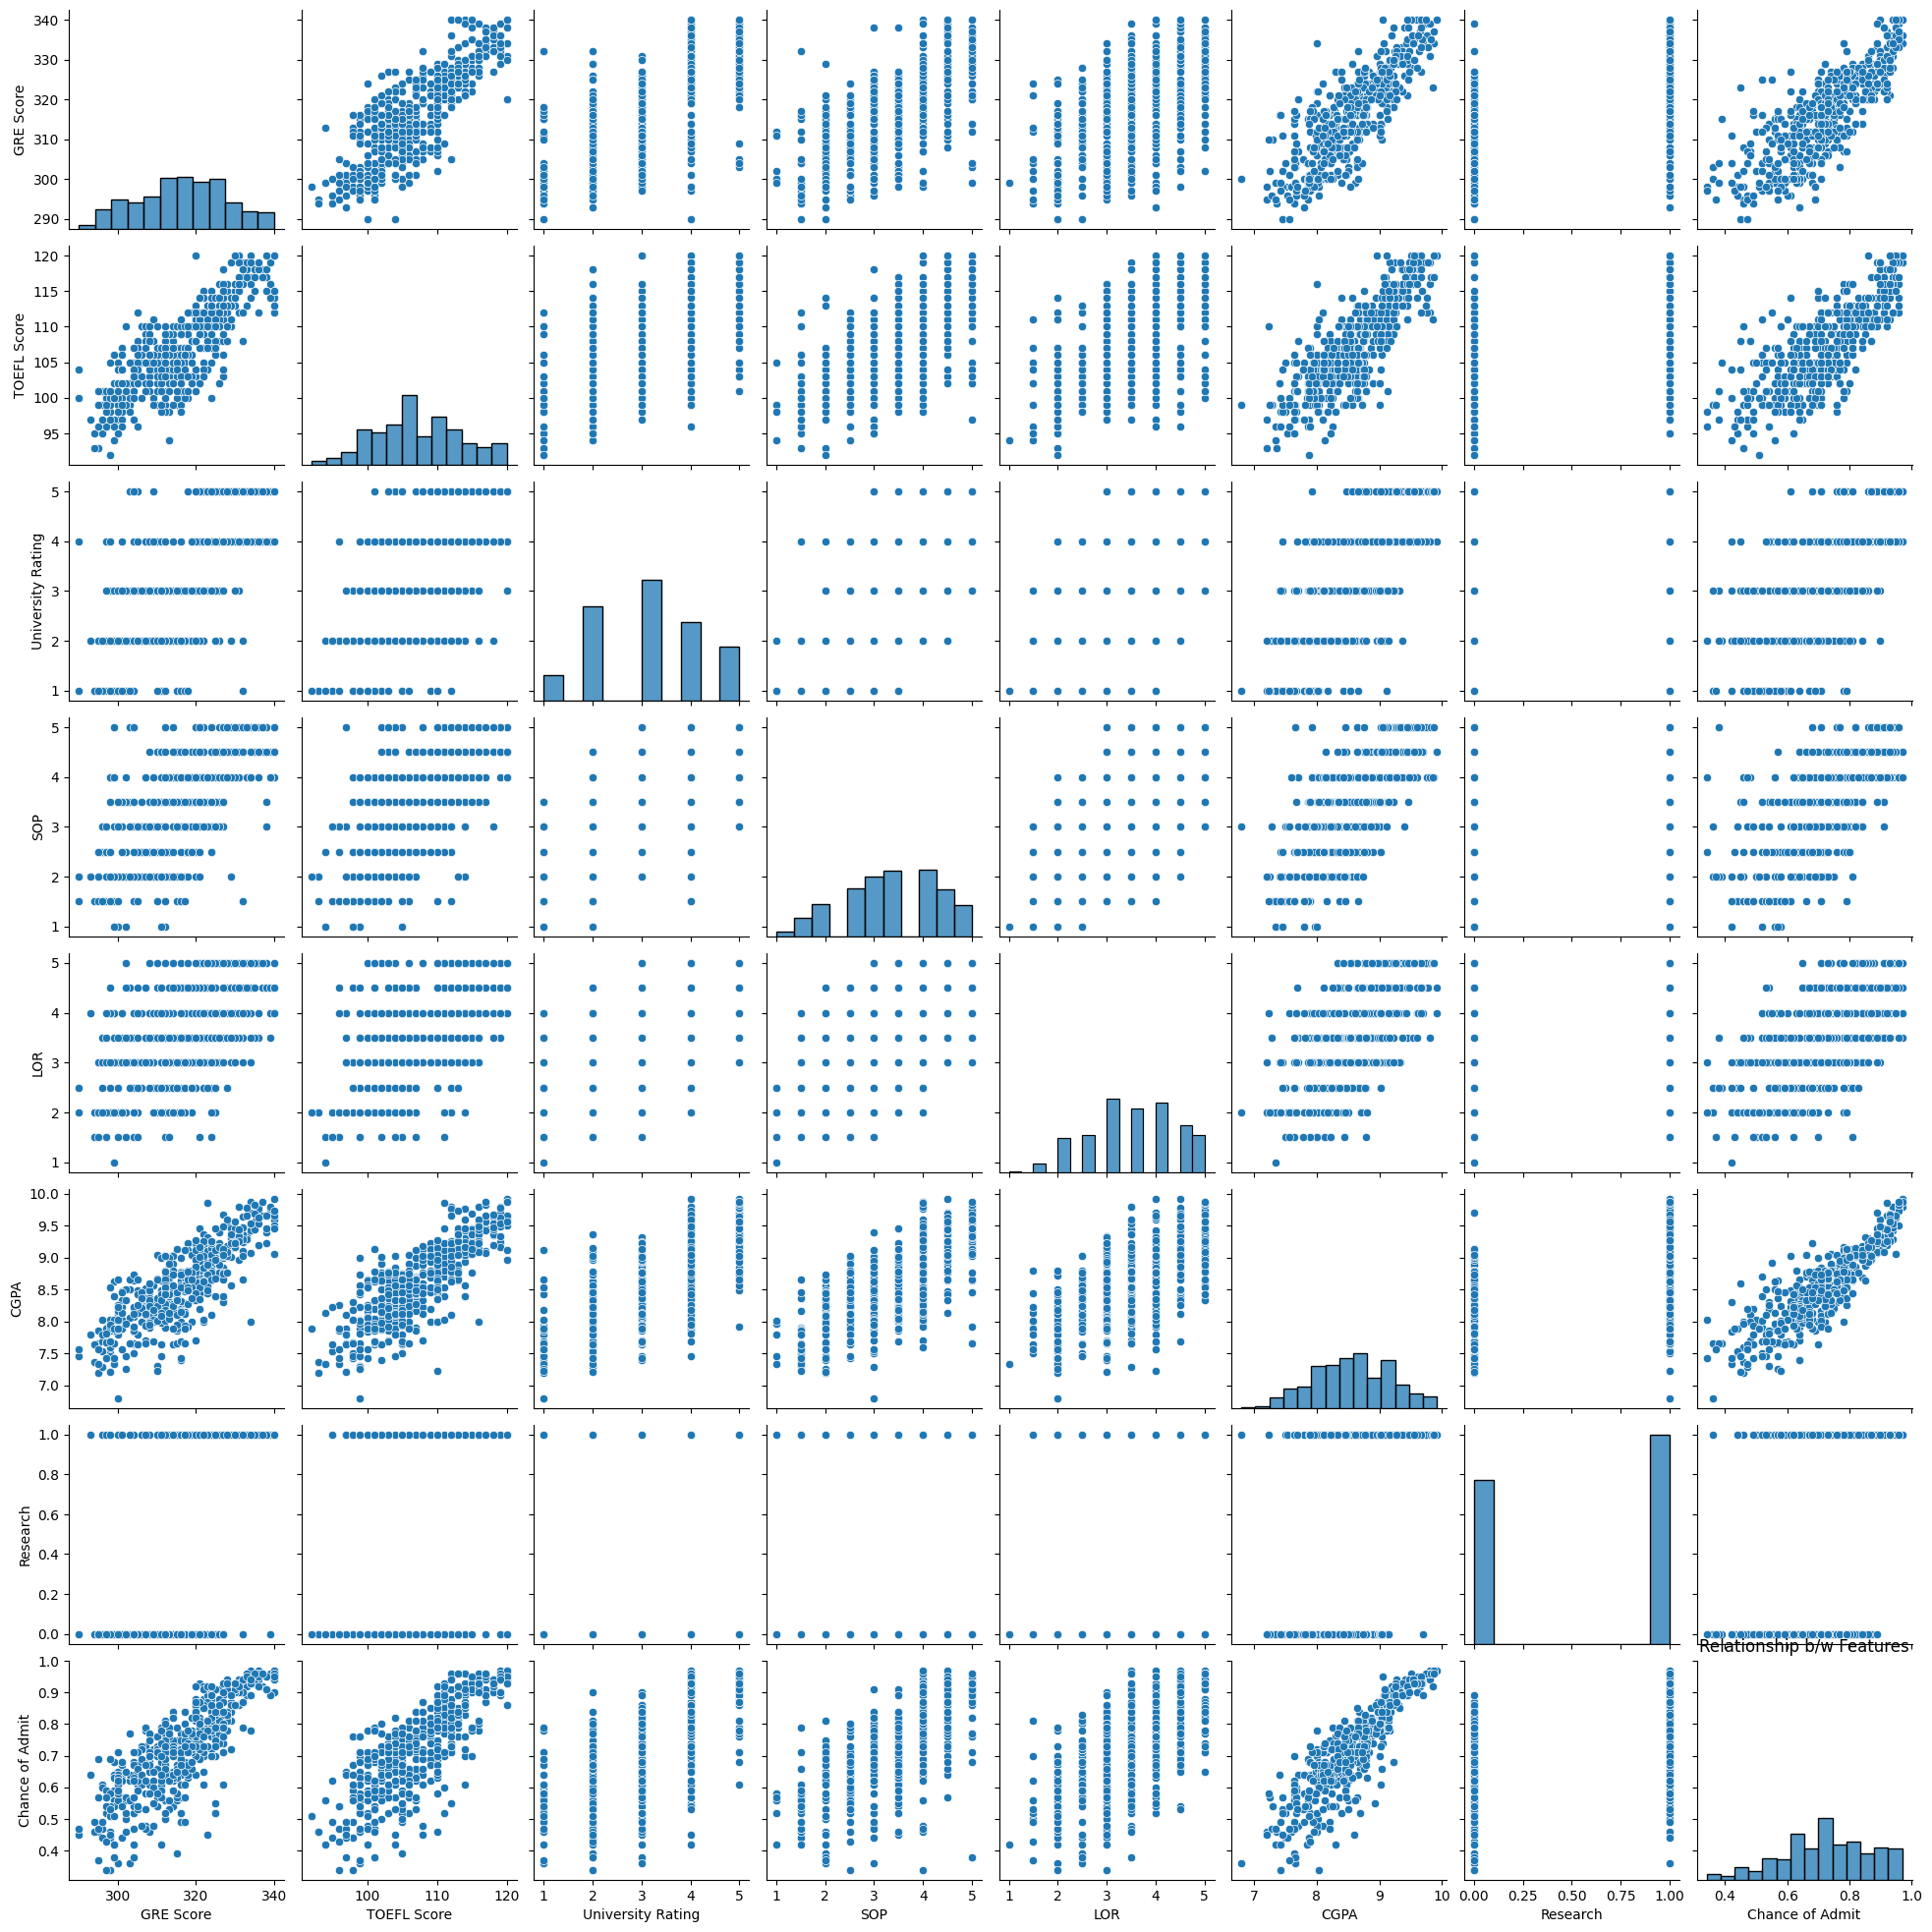

In [24]:
sns.pairplot(df_new)
plt.title('Relationship b/w Features')
plt.show();

### Pairplot Analysis

* Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit
* While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
* We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

In [25]:
df_new.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

* Values of University Rating, SOP and LOR are not continous hence we can convert them into category variables
* Value of Research can be converted to bool as its in [0,1].

In [26]:
df_new[['University Rating', 'SOP', 'LOR']] = df_new[['University Rating', 'SOP', 'LOR']].astype('category')
df_new['Research'] = df_new['Research'].astype('bool')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    bool    
 7   Chance of Admit    500 non-null    float64 
dtypes: bool(1), category(3), float64(2), int64(2)
memory usage: 18.6 KB


### Distribution of categorical variables
* University Rating
* SOP
* LOR
* Research

In [27]:
cat_cols = df_new.select_dtypes(include=['category','bool']).columns.tolist()
cat_cols

['University Rating', 'SOP', 'LOR', 'Research']

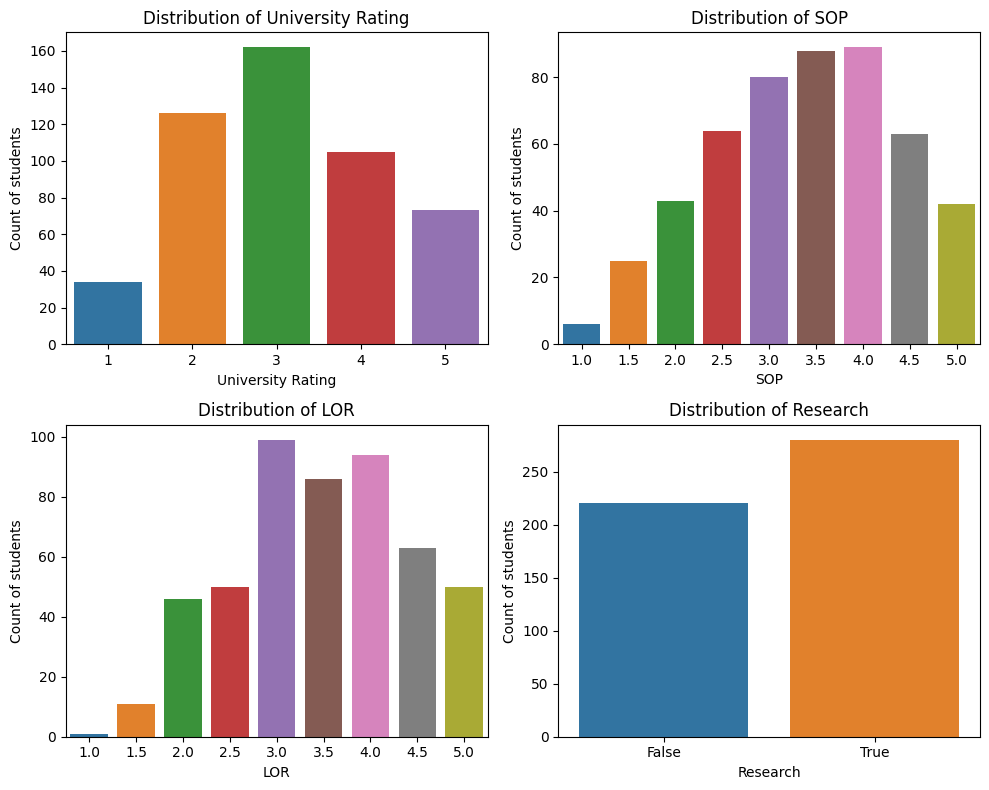

In [28]:
plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
    ax = plt.subplot(2,2,i)
    sns.countplot(x=df_new[col])
    plt.xlabel(col)
    plt.ylabel('Count of students')
    plt.title(f'Distribution of {col}')
    i+=1

plt.tight_layout()
plt.show()

### Observation
* University rating of 3 is most common
* SOP & LOR are majorly between 3 to 4
* Number of students with research is more than their counterparts

### Distribution of Numerical variables


In [29]:
num_cols = df_new.select_dtypes(include=['int','float']).columns.tolist()
num_cols

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

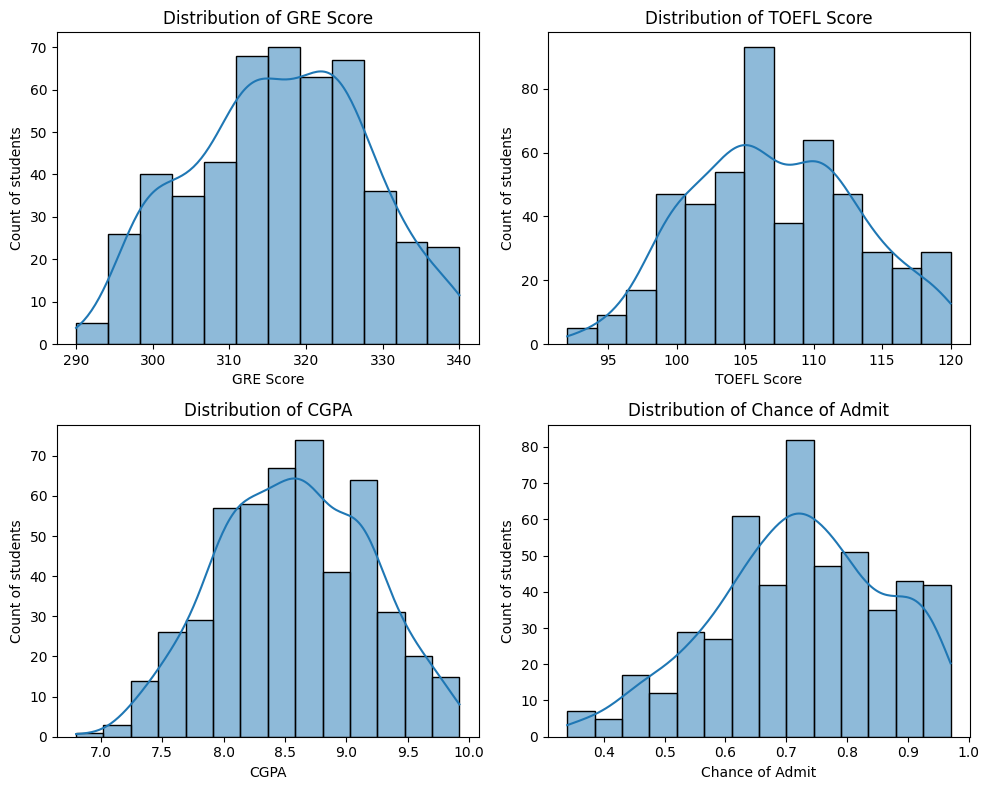

In [30]:
plt.figure(figsize=(10,8))
i = 1

for col in num_cols:
    nxm = plt.subplot(2,2,i)
    sns.histplot(data=df_new[col],kde=True)
    plt.xlabel(col)
    plt.ylabel('Count of students')
    plt.title(f'Distribution of {col}')
    i+=1

plt.tight_layout()
plt.show()

### Observations from histplot
* GRE score ranges from 290-340 with maximum distribution in 310-325.
* TOEFL score ranges from 90-120 with maximun count around 105
* CGPA ranges from 7 to 10 with hight density in 8 to 9
* Chance of admit lies from 0 to 1 with maximub around 0.7

### Boxplot Analysis for categorical variables

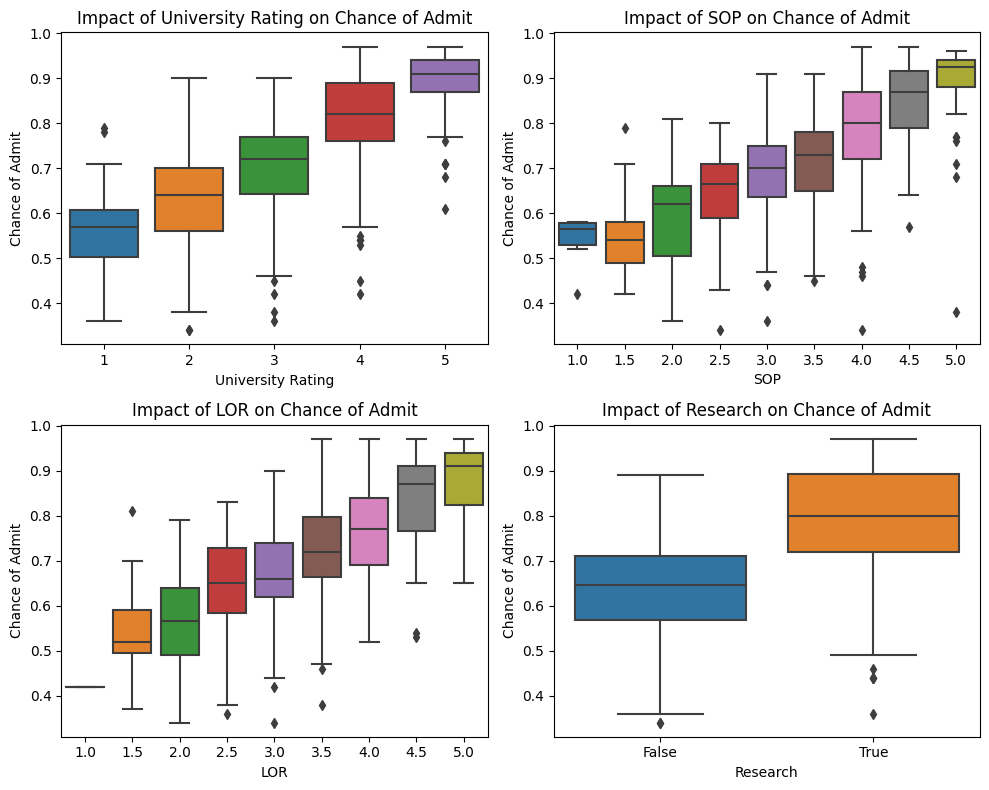

In [31]:
plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
    nxm = plt.subplot(2,2,i)
    sns.boxplot(data = df_new,x=col,y='Chance of Admit')
    plt.xlabel(col)
    plt.ylabel('Chance of Admit')
    plt.title(f'Impact of {col} on Chance of Admit')
    i+=1

plt.tight_layout()
plt.show()

### Boxplot Analysis for Numerical columns

In [32]:
num_cols

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

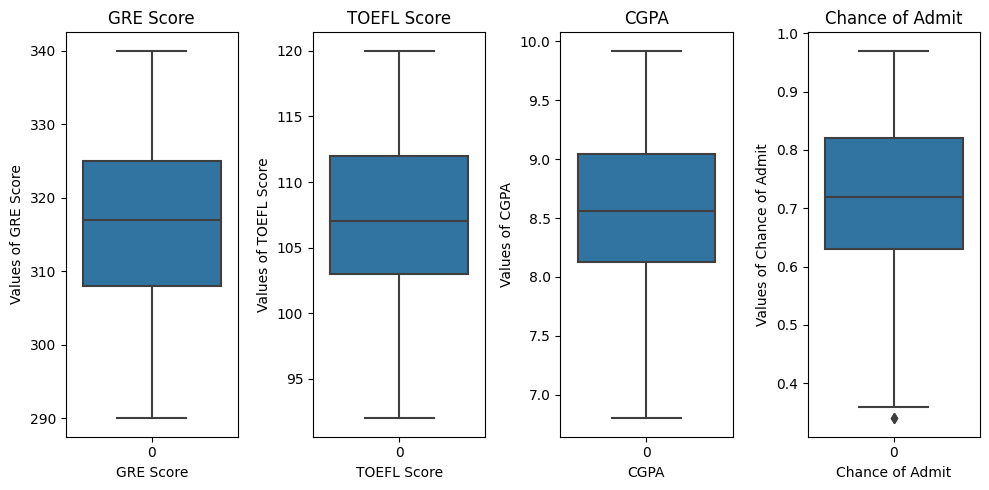

In [33]:
plt.figure(figsize=(10,5))
i = 1

for col in num_cols:
    alm = plt.subplot(1,4,i)
    sns.boxplot(data=df_new[col])
    plt.xlabel(col)
    plt.ylabel(f'Values of {col}')
    plt.title(col)
    i+=1

plt.tight_layout()
plt.show()

#### Observations
* For all the 4 numerical variables there are no outliers and all the values are within range for particular variable

In [34]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* No Null or NaN values

In [35]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Train-Test Split for Linear Regression

In [36]:
num_cols.remove('Chance of Admit')

In [37]:
x = df_new[num_cols + cat_cols]
x.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,True
1,324,107,8.87,4,4.0,4.5,True
2,316,104,8.00,3,3.0,3.5,True
3,322,110,8.67,3,3.5,2.5,True
4,314,103,8.21,2,2.0,3.0,False


In [38]:
y = df_new['Chance of Admit']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [40]:
%matplotlib inline

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (400, 7)
Shape of x_test : (100, 7)
Shape of y_train : (400,)
Shape of y_test : (100,)


### Label encoding & standardisation

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [43]:
#Initialize label encoders dictionary
label_encoders = {}

for col in cat_cols:
    label_encoders[col] = LabelEncoder()

In [44]:
label_encoders

{'University Rating': LabelEncoder(),
 'SOP': LabelEncoder(),
 'LOR': LabelEncoder(),
 'Research': LabelEncoder()}

In [45]:
#Fitting encoders to respective columns
for col in cat_cols:
    label_encoders[col].fit(x[col])

In [46]:
#Transform cat cols in train and test data

for col in cat_cols:
    x_train[col] = label_encoders[col].transform(x_train[col])
    x_test[col] = label_encoders[col].transform(x_test[col])

In [47]:
x_train.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
249,321,111,8.83,2,5,6,1
433,316,111,8.54,3,6,8,0
19,303,102,8.50,2,5,4,0
322,314,107,8.27,1,3,6,0
332,308,106,8.21,2,5,3,1


In [48]:
x_cat_encoded = pd.concat([x_train, x_test])
x_cat_encoded.head(10)

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
249,321,111,8.83,2,5,6,1
433,316,111,8.54,3,6,8,0
19,303,102,8.50,2,5,4,0
322,314,107,8.27,1,3,6,0
332,308,106,8.21,2,5,3,1
56,316,102,7.40,2,2,4,0
301,319,108,8.76,1,3,4,0
229,324,111,9.01,3,4,4,1
331,311,105,8.12,1,4,2,1
132,309,105,8.56,4,5,5,0


### MinMax Scalar Standardisation

In [49]:
#Initialising object of MinMaxScalar for standardisation
scalar_x = MinMaxScaler()

In [50]:
scalar_x.fit(x_cat_encoded)

MinMaxScaler()

In [51]:
all_cols = x_train.columns
all_cols

Index(['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'SOP', 'LOR',
       'Research'],
      dtype='object')

In [52]:
#Transform all columns of x_train and x_test
x_train[all_cols] = scalar_x.transform(x_train[all_cols])
x_test[all_cols] = scalar_x.transform(x_test[all_cols])

In [53]:
x_train.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
249,0.62,0.678571,0.650641,0.50,0.625,0.750,1.0
433,0.52,0.678571,0.557692,0.75,0.750,1.000,0.0
19,0.26,0.357143,0.544872,0.50,0.625,0.500,0.0
322,0.48,0.535714,0.471154,0.25,0.375,0.750,0.0
332,0.36,0.500000,0.451923,0.50,0.625,0.375,1.0


In [54]:
x_test.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
361,0.88,0.857143,0.878205,0.75,0.750,0.625,1.0
73,0.48,0.571429,0.717949,0.75,0.875,0.750,1.0
374,0.50,0.464286,0.272436,0.25,0.250,0.375,0.0
155,0.44,0.607143,0.605769,0.50,0.500,0.500,0.0
104,0.72,0.714286,0.721154,0.50,0.625,0.500,1.0


## Linear Regression - Base Model Evaluation

In [55]:
#Initialise object of class linear regression
lr_model = LinearRegression()

In [56]:
#Fitting regression model for train data - x and y
lr_model.fit(x_train,y_train)

LinearRegression()

In [57]:
#predict values for train and test data

y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

#### Model evaluation

In [58]:
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [59]:
# model evaluation for train predictions
model_evaluation(y_train.values,y_pred_train,lr_model)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


In [60]:
# model evaluation for test predictions
model_evaluation(y_test.values,y_pred_test,lr_model)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


### Observations

Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model

Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%
Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
R2 Score of 0.82 means that our model captures 82% variance in the data
Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction

In [61]:
lr_model.coef_.round(2)

array([0.12, 0.08, 0.35, 0.01, 0.01, 0.07, 0.02])

In [62]:
# Model Coefficients

for feature,weight in zip(x_train.columns, lr_model.coef_):
    print(f"Weight of {feature}: {np.round(weight,2)}")

Weight of GRE Score: 0.12
Weight of TOEFL Score: 0.08
Weight of CGPA: 0.35
Weight of University Rating: 0.01
Weight of SOP: 0.01
Weight of LOR: 0.07
Weight of Research: 0.02


In [63]:
# Bias Term of the Model

lr_model.intercept_.round(2)

0.35

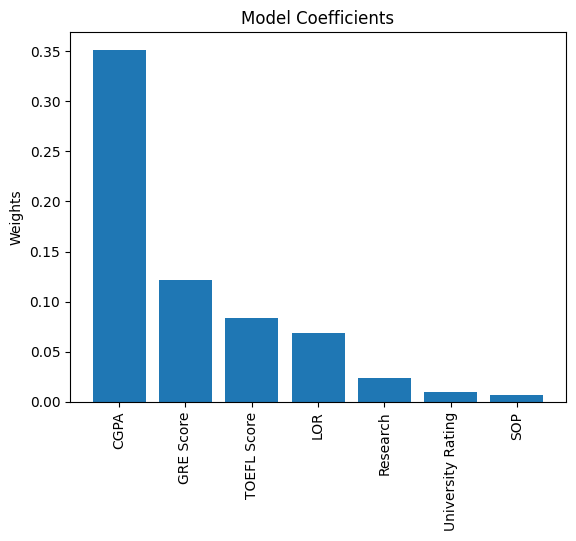

In [64]:
model_weights=list(zip(x_train.columns, lr_model.coef_))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show();

* CGPA & GRE scores have the highest weight
* SOP, University rating, and research have the lowest weights

### Testing Assumptions of Linear Regression Model

#### Multicolinearity Check

VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:

VIF(j) = 1 / (1 - R(j)^2)

Where:

j represents the jth predictor variable. R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables.

In [65]:
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif

,Variable,VIF
0,GRE Score,31.185925
1,TOEFL Score,26.753950
2,CGPA,41.732265
3,University Rating,10.837374
4,SOP,18.864173
5,LOR,14.657099
6,Research,3.366187


We see that almost all the variables (excluding research) have a very high level of colinearity. This was also observed from the correlation heatmap which showed strong positive correlation between GRE score, TOEFL score and CGPA.

### Mean of Residuals

The mean of residuals represents the average of residual values in a regression model. Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.

The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average. However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values

In [66]:
residuals = y_test.values - y_pred_test
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.005453623717661285


Mean of Residuals close to 0 implies model is unbiased

### Linearity of Variables

Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "no pattern in the residual plot" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.
U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.
Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.
Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.
If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.

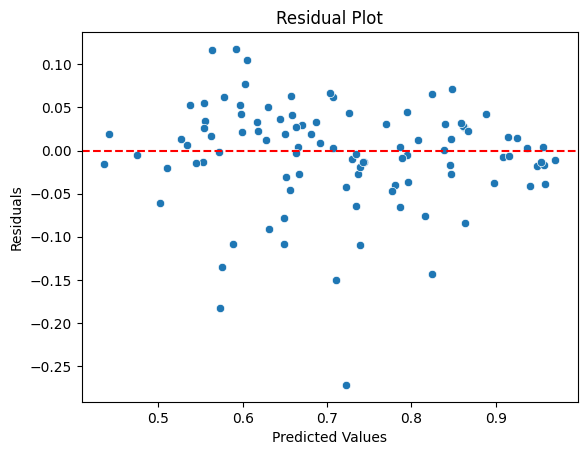

In [67]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();

Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists

### Homoscedasticity

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that you can use:

Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals.

Breusch-Pagan Test: This is a statistical test for homoscedasticity. It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model. If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity. However, this test assumes that the errors follow a normal distribution.

Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity. Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

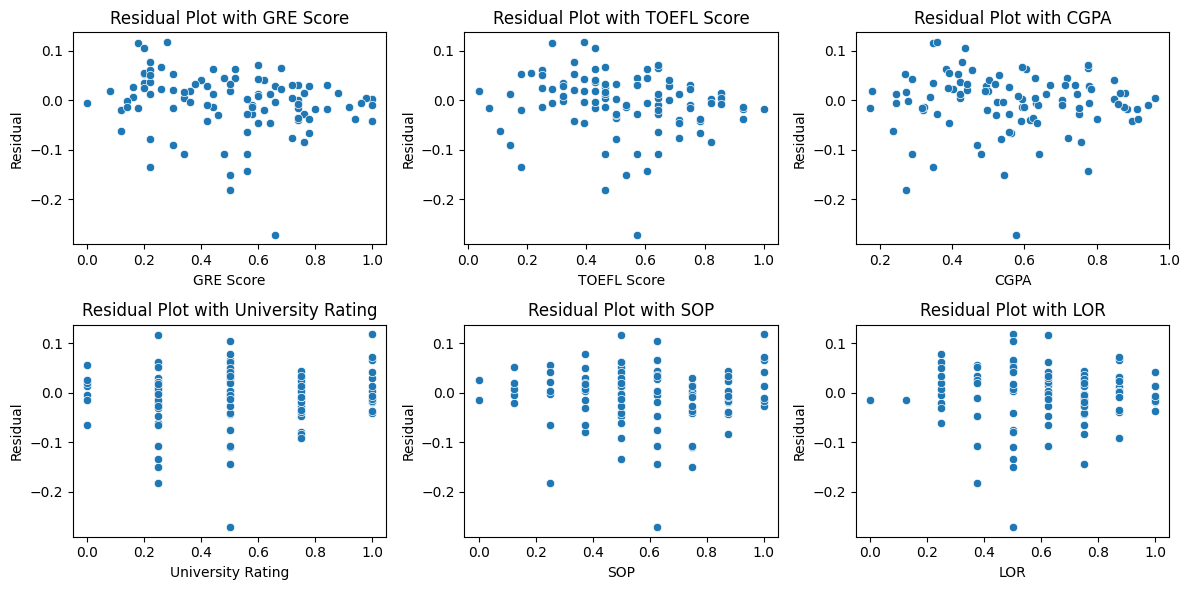

In [68]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show();

Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.

### Normality of Residuals

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, you can follow these steps:

Residual Histogram: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

Q-Q Plot (Quantile-Quantile Plot): This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

Shapiro-Wilk Test: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.

Skewness and Kurtosis: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

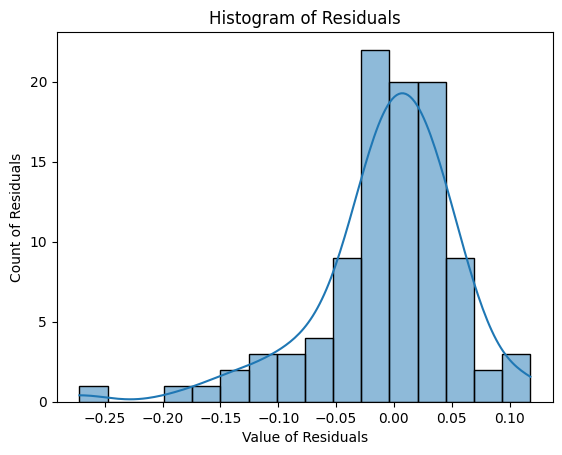

In [69]:
#Histogram of Residuals
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution

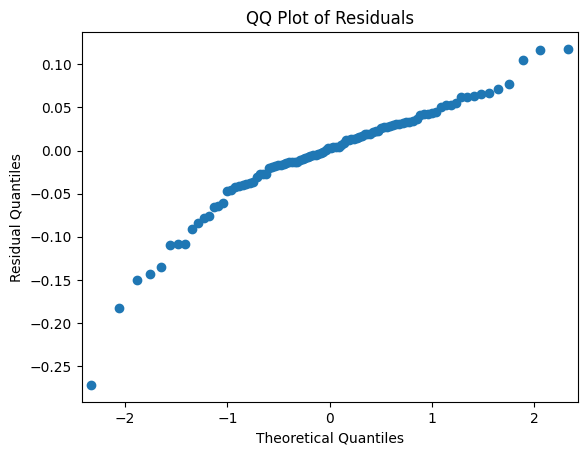

In [70]:
# QQ-Plot of residuals
sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show();

The QQ plot shows that residuals are slightly deviating from the straight diagonal.

### Lasso and Ridge Regression

Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

Ridge Regression: Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

Lasso Regression: Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

The main differences between Ridge and Lasso regression are:

Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

In [71]:
#Initialize ridge and lasso regression objects
ridge_model = Ridge()
lasso_model = Lasso()

In [72]:
# fitting the models
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)


Lasso()

In [73]:
# Ridge predict
y_train_ridge = ridge_model.predict(x_train)
y_test_ridge = ridge_model.predict(x_test)


In [74]:
# Lasso predict
y_train_lasso = lasso_model.predict(x_train)
y_test_lasso = lasso_model.predict(x_test)

In [75]:
# Evaluating Model Performance
print('Ridge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_ridge, ridge_model)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_ridge, ridge_model)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_lasso, lasso_model)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_lasso, lasso_model)

Ridge Regression Training Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


Ridge Regression Test Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Lasso Regression Training Accuracy

MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.02


Lasso Regression Test Accuracy

MAE: 0.12
RMSE: 0.14
R2 Score: -0.01
Adjusted R2: -0.09


While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data

### Best Model Evaluation

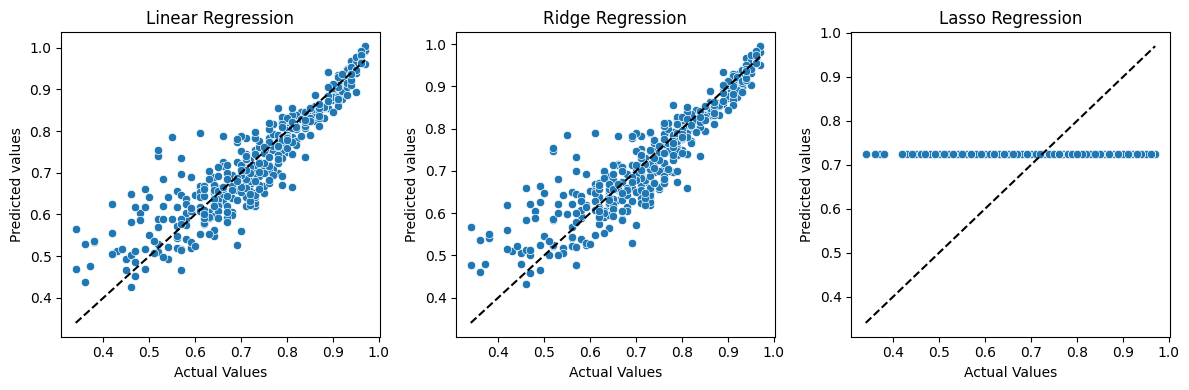

In [76]:
# Actual v/s Predicted values for training data

actual_values = y_train.values.reshape((-1,))

predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]

model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(12,4))
i=1

for pred_values in predicted_values:
    nxm = plt.subplot(1,3,i)
    sns.scatterplot(x=actual_values,y=pred_values)
    plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted values')
    plt.title(model[i-1])
    i+=1

plt.tight_layout()
plt.show()

* We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

* This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

### Insights & Recommendations

* Exams like GRE,TOEFL and CGPA are strongly correlated
* 'Chance of Admit' has high correlation with Exams (GRE/TOEFL/CGPA)
* categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit
* CGPA has highest weight while SOP has lowest for regression model
* Both linear and ridge regression has performed very well and captured upto 82% variance
* Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.

#### Recommendations:

* Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction.
* Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables